
## Before your start:

   - Read the README.md file
   - Comment as much as you can and use the resources in the README.md file
   - Happy learning!



# Image Segmentation

**Image Segmentation** is an image analysis task in which we classify each pixel in the image into a class. This is similar to what us humans do all the time by default. 

What’s the first thing you do when you’re attempting to cross the road?

We typically look left and right, take stock of the vehicles on the road, and make our decision. Our brain is able to analyze, in a matter of milliseconds, what kind of vehicle (car, bus, truck, auto, etc.) is coming towards us. Whenever we are looking at something, then we try to “segment” what portion of the image belongs to which class/label/category.

![test](images/test.jpeg)

## So how does image segmentation work?

We can divide or partition the image into various parts called segments. It’s not a great idea to process the entire image at the same time as there will be regions in the image which do not contain any information. By dividing the image into segments, we can make use of the important segments for processing the image. That, in a nutshell, is how image segmentation works.

An image is a collection or set of different pixels. We group together the pixels that have similar attributes using image segmentation. 

**Sooner or later all things are numbers, including images.**

In [1]:
# Install torch & torchvision, it might take some time

#!pip3 install torch
#!pip3 install torchvision
#!pip3 install pillow

In [2]:
# Import your libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

from PIL import Image
from imageProcessing import resizeImg, generateMask

%matplotlib inline

## Challenge 1 - Load a picture & let the magic begin!


In order to be able to segment an image, what **we first need is an image**. So, first thing you should do is loading one of yourself. Use [`Image.open`](https://pillow.readthedocs.io/en/3.1.x/reference/Image.html) for this purpose and call `img` to this variable. (In case you don't want to use your own image you can use one located at `images/bird.png`.

Using this function you will be using Pillow, the most popular and de facto standard library in Python for loading and working with image data. However, if you'd like to see how gorgeous you look on that picture, try using [`plt.show`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html).

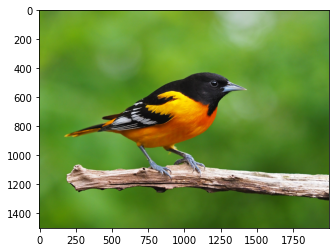

In [3]:
img = Image.open("images/bird.png")
plt.imshow(img)
#img.show() lo enseña en un visor de imágenes a parte

Sometimes it is desirable to thumbnail all images to have the same width or height. In this case, the width, will be reduced to 256, using `resizeImg`, and the height will be scaled in order to retain the aspect ratio of the image.

*Hint: use `img.size` as much as you need until you get a size of (384, 256)*.

In [4]:
# Método 1
# Aspect Ratio calculation
AR = img.size[0]/img.size[1]

# New dimensions
new_H = 256
new_W = int(new_H*AR)

# Reshaping the image
img_res = img.resize((new_W, new_H))

# Check new image size
img_res.size

(341, 256)

In [5]:
# Método 2
#newimg = resizeImg(img)

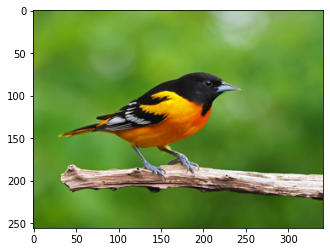

In [6]:
plt.imshow(img_res)

But, don't worry! This time won't be that difficult, you get some code to make your life easier.
Here the function `generateMask`, as you may imagine, will generate a [`mask`](http://www.xinapse.com/Manual/masking.html) for the picture you loaded. One for the background of the picture, one for the foreground. 

In [7]:
# Generate a mask

mask = generateMask(img_res) # mask es un array
                            # generateMask detecta el contorno del bicho. Colorea de negro [0, 0, 0] el fondo
                            # y de otro color (128?) el pájaro
background_mask = np.all(mask == [0, 0, 0], axis=-1) # background_mask es un array
                                                     # Selecciona el pixel si es background, es decir, si es
                                                     # de color negro == [0,0,0]
foreground_mask = np.any(mask != [0, 0, 0], axis=-1) # foreground_mask es un array
                                                     # Selecciona el pixel si no está coloreado de negro 

Now it's your turn again, convert the image to np.array and apply the mask twice to the picture, once to the `foreground` and once to the `background`. Make a couple of copies of the image instead of assigning the same value to different variables. After doing this, you may want to check how those are looking. 

In [8]:
# Convet the image to np.array
img_array = np.array(img_res)

# It is a RGB image, so img_array will be 3D
# To see each layer of color, change between o (Red), 1 (Green), 2 (Blue):
#plt.imshow(img_array[:,:,0])

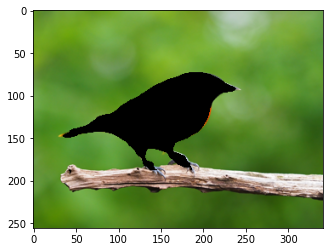

In [9]:
# BACKGROUND MASK
# As the array is 3D, the mask has to be apply in the 3 layers of colors

# Create the array of the background
back_array = np.zeros(img_array.shape) #((256, 341, 3))

# Apply the mask to the 3 layers
back_array[:,:,0] = img_array[:, :, 0]*background_mask
back_array[:,:,1] = img_array[:, :, 1]*background_mask
back_array[:,:,2] = img_array[:, :, 2]*background_mask

# Show the figure
plt.figure()
plt.imshow((back_array).astype(np.uint8))

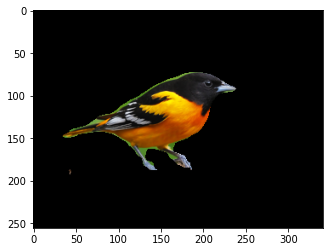

In [10]:
# FOREGROUND MASK
# As the array is 3D, the mask has to be apply in the 3 layers of colors

# Create the array of the background
fore_array = np.zeros(img_array.shape)

# Apply the mask to the 3 layers
fore_array[:,:,0] = img_array[:, :, 0]*foreground_mask
fore_array[:,:,1] = img_array[:, :, 1]*foreground_mask
fore_array[:,:,2] = img_array[:, :, 2]*foreground_mask

# Show the figure
plt.figure()
plt.imshow((fore_array).astype(np.uint8))

## Challenge 2 - Two 2-dimensional arrays, one channel

Convolution involving one-dimensional signals is referred to as 1D convolution or just convolution. Otherwise, if the convolution is performed between two signals spanning along two mutually perpendicular dimensions (i.e., if signals are two-dimensional in nature), then it will be referred to as [`2D convolution`](http://www.songho.ca/dsp/convolution/convolution2d_example.html). 

This kind of operation is extensively used in the field of digital image processing, such as smoothing, sharpening, and edge detection of images. Wherein the 2D matrix representing the image will be convolved with a comparatively smaller matrix called 2D kernel. 

[*What do you mean by one channel?*](https://brohrer.github.io/convert_rgb_to_grayscale.html)

Color images are represented as three-dimensional Numpy arrays - a collection of three two-dimensional arrays, one each for red, green, and blue channels. Each one, like grayscale arrays, has one value per pixel and their ranges are identical. 

An intuitive way to convert a color image 3D array to a grayscale 2D array is, for each pixel, take the average of the red, green, and blue pixel values to get the grayscale value. This combines the lightness or luminance contributed by each color band into a reasonable gray approximation. 

<img src="images/perritorgb.png" width="500">





#### First let's begin with black and white (only one channel)

Transform `foreground` and `background`, now they are arrays, to an image and convert them in gray scale. Name them `fore_bnw` and `back_bnw` respectively.

*Hint: use `.fromarray` and then `.convert`*.

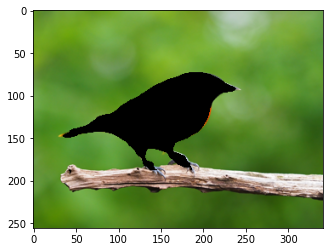

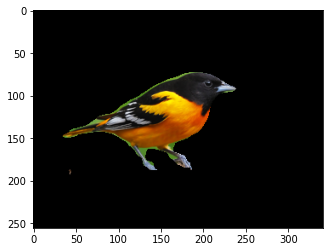

In [11]:
# Convert background and foreground arrays into an image

# Convert the array into an image
back_RGB = Image.fromarray(back_array.astype("uint8"))
plt.figure()
plt.imshow(back_RGB) # Imagen del fondo

# Convert the array into an image
fore_RGB = Image.fromarray(fore_array.astype("uint8"))
plt.figure()
plt.imshow(fore_RGB) # Imagen del pájaro

In [12]:
# Convert the RGB image into Gray scale
back_bnw = back_RGB.convert("L")
fore_bnw = fore_RGB.convert("L")

In [13]:
# Método 2
# También podríamos haber convertido el 3D array en un 2D array convirtiendo la escala RGB en escala de 
# grises por medio de la ecuación:
# array_back_gray = np.mean(array_back, axis=2)
# Y luego haberlo convertido a imagen

Show `fore_bnw` and `back_bnw` in order to check that they are in a gray scale.

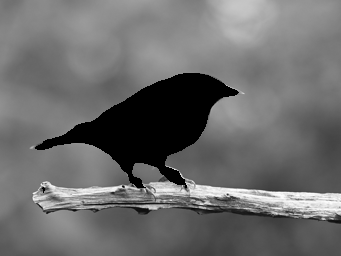

In [14]:
#plt.figure()
#plt.imshow(back_bnw, cmap= "gray") # Así lo estamos ploteando en escala de grises
back_bnw

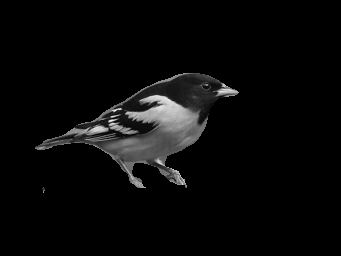

In [15]:
#plt.figure()
#plt.imshow(fore_bnw, cmap= "gray")
fore_bnw

Now transform `back_bnw` into an array and name it `back_np`.

And create a 2d matrix with random values of size 20x20 uniformly distributed and name it `kernel`.

In [16]:
# En procesamiento de imagen un núcleo o kernel es una matriz pequeña que se utiliza para desenfoque, 
# enfoque, realce, etc. Esto se logra realizando una convolución entre el kernel y la imagen.

# Transform back_bnw into an array
back_np = np.array(back_bnw)

# Create 2d matrix
kernel = np.random.random((20, 20))

Now you must use `signal.convolve2d` from scipy and pass the array image (`back_np`) and the kernel as parameters. [Check the docs for `convolve2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) and assign it to a variable called `conv`.

*Hint: use mode='same' in order to get an array with the same size as the input one.*

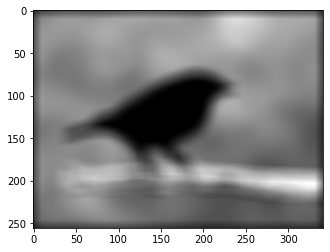

In [17]:
# Convolucionamos dos arrays para obtener un tercero
conv = scipy.signal.convolve2d (back_np, kernel, mode = "same") # conv.shape = (256, 341), conv es array
plt.imshow(conv, cmap = "gray")

Now you must operate with `conv` in order to have their values between 0 and 255.

In [18]:
# First normalize between 0 and 1
# Then multiply by 255

conv2 = (conv-conv.min())/(conv.max()-conv.min())*255 # conv2 sigue siendo un array

Apply `.absolute` from numpy to the new value of `conv` and assign it to `back_blur`, and if you show this `back_blur` you will notice that the blur effect has been apply to the background.


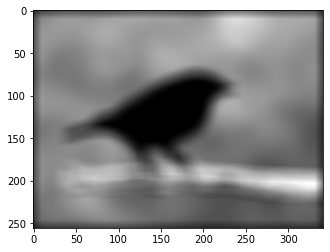

In [19]:
back_blur = np.absolute(conv2) # Calculate the absolute value... not necessary for us. back_blur is array
plt.imshow(back_blur, cmap = "gray")

Finally, create a new variable called `final` which have `back_blur` and `fore_bnw` arrays using the `.add` function.

Make sure the type of the output is `np.uint8`, else use the `.astype` function. Show `final`.

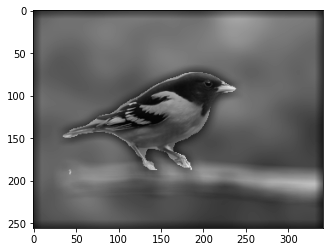

In [20]:
# To use np.add we need two arrays: black_bur is already an array but we have to convert fore_bnw into array
fore_bnw_array = np.array(fore_bnw)
final = np.add(back_blur, fore_bnw_array)
#final = final.astype("uint8")
plt.imshow(final, cmap = "gray")

## Challenge 3 -  Once wasn't enough, do it three times

**aquí es donde la matan**
-Marc Pomar

Define a `def blur(img): ...` function which blurs an image having RGB channels. To do this:
1. Using numpy generate a 2d matrix with random values of size 20x20 uniformly distributed. We call this the `kernel`.  
2. Use `signal.convolve2d` from scipy and pass the image and the kernel as parameters.[Check the docs for `convolve2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)
3. Check the output values and ensure data is in range 0-255. *Hint: Divide the output array by max value.*

Make sure the type of the output is `np.uint8`.

In [28]:
def blur (img):
    # Convertimos la imagen en un np.array de 3D
    img_array = np.array(img) 
    
    # Creamos un np.array de 3D para guardar la imagen borrosa
    blurred_array = np.zeros(img_array.shape)
    
    # Definimos el kernel
    kernel = np.random.random((20, 20))
    
    for i in range(3): # 3 colores, RGB
        # Convolución de una capa y el kernel
        conv = scipy.signal.convolve2d (img_array[:,:, i], kernel, mode = "same")
        conv2 = (conv-conv.min())/(conv.max()-conv.min())*255
        blurred_array[:,:, i] = np.absolute(conv2)
    return blurred_array

Once you have demonstrated you are a great coder defining the `blur` function. It's time for you to check if it works, bluring the background of the `background` image.

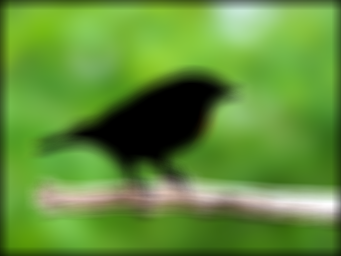

In [29]:
back_blur_RGB = blur(back_RGB)
Image.fromarray(back_blur_RGB.astype("uint8"))

Apply the `foreground_mask` again. 

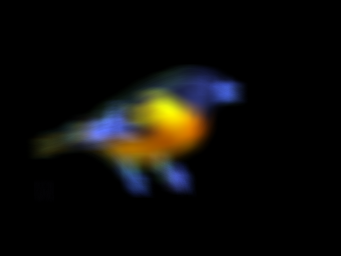

In [30]:
fore_blur_RGB = blur(fore_RGB)
Image.fromarray(fore_blur_RGB.astype("uint8"))

Sum the blured background and the original foreground using [`np.add`](https://numpy.org/doc/1.18/reference/generated/numpy.add.html).

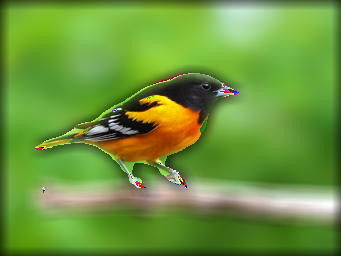

In [31]:
img_blur = np.add(back_blur_RGB, fore_array)
img_blur = Image.fromarray(img_blur.astype("uint8"))
img_blur

Finally, once you've got something like the picture below, please, export that **Image**. Make sure you add this result and all of those you generate to the Pull Request.

<img src="images/bird.png" width="300">
<img src="images/blured_bird.JPG" width="300">

In [32]:
img_blur.save("bird_blur_Bea.jpg") 

## Enjoy your weekend!